1) Завантажити дані, вивести назви колонок і розмір датасета

In [25]:
import pandas as pd

df = pd.read_csv('dataset.csv')

print("Назви колонок:", df.columns)

print("Розмір датасету:", df.shape)

Назви колонок: Index(['ID', 'Age', 'Gender', 'Heart_Attack', 'Blood_Pressure', 'Cholesterol',
       'Diabetes', 'Smoking', 'Alcohol_Consumption', 'Exercise_Level', 'BMI',
       'Family_History', 'Diet_Type', 'Stress_Level', 'Residence',
       'Education_Level', 'Employment_Status', 'Income_Level',
       'Marital_Status', 'Sleep_Hours', 'Medication', 'Hypertension',
       'Heart_Rate', 'Physical_Activity_Hours', 'Dietary_Fiber_Intake',
       'Sodium_Intake', 'Cultural_Background', 'Genetic_Risk_Score',
       'Age_Group', 'Screen_Time'],
      dtype='object')
Розмір датасету: (270000, 30)


2) Опрацювати пропуски (по можливості заповнити їх або видалити)

Перевірка на пропуски в кожній колонці

In [26]:
print(df.isnull().sum())

ID                              0
Age                             0
Gender                          0
Heart_Attack                    0
Blood_Pressure                  0
Cholesterol                     0
Diabetes                        0
Smoking                         0
Alcohol_Consumption        134882
Exercise_Level                  0
BMI                             0
Family_History                  0
Diet_Type                       0
Stress_Level                    0
Residence                       0
Education_Level                 0
Employment_Status               0
Income_Level                    0
Marital_Status                  0
Sleep_Hours                     0
Medication                      0
Hypertension                    0
Heart_Rate                      0
Physical_Activity_Hours         0
Dietary_Fiber_Intake            0
Sodium_Intake                   0
Cultural_Background             0
Genetic_Risk_Score              0
Age_Group                       0
Screen_Time   

Заповнення пропусків найбільш частим значенням для категоріальних даних без inplace та перевірка на пропуски після опрацювання

In [27]:
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0])

print(df.isnull().sum())

ID                         0
Age                        0
Gender                     0
Heart_Attack               0
Blood_Pressure             0
Cholesterol                0
Diabetes                   0
Smoking                    0
Alcohol_Consumption        0
Exercise_Level             0
BMI                        0
Family_History             0
Diet_Type                  0
Stress_Level               0
Residence                  0
Education_Level            0
Employment_Status          0
Income_Level               0
Marital_Status             0
Sleep_Hours                0
Medication                 0
Hypertension               0
Heart_Rate                 0
Physical_Activity_Hours    0
Dietary_Fiber_Intake       0
Sodium_Intake              0
Cultural_Background        0
Genetic_Risk_Score         0
Age_Group                  0
Screen_Time                0
dtype: int64


3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

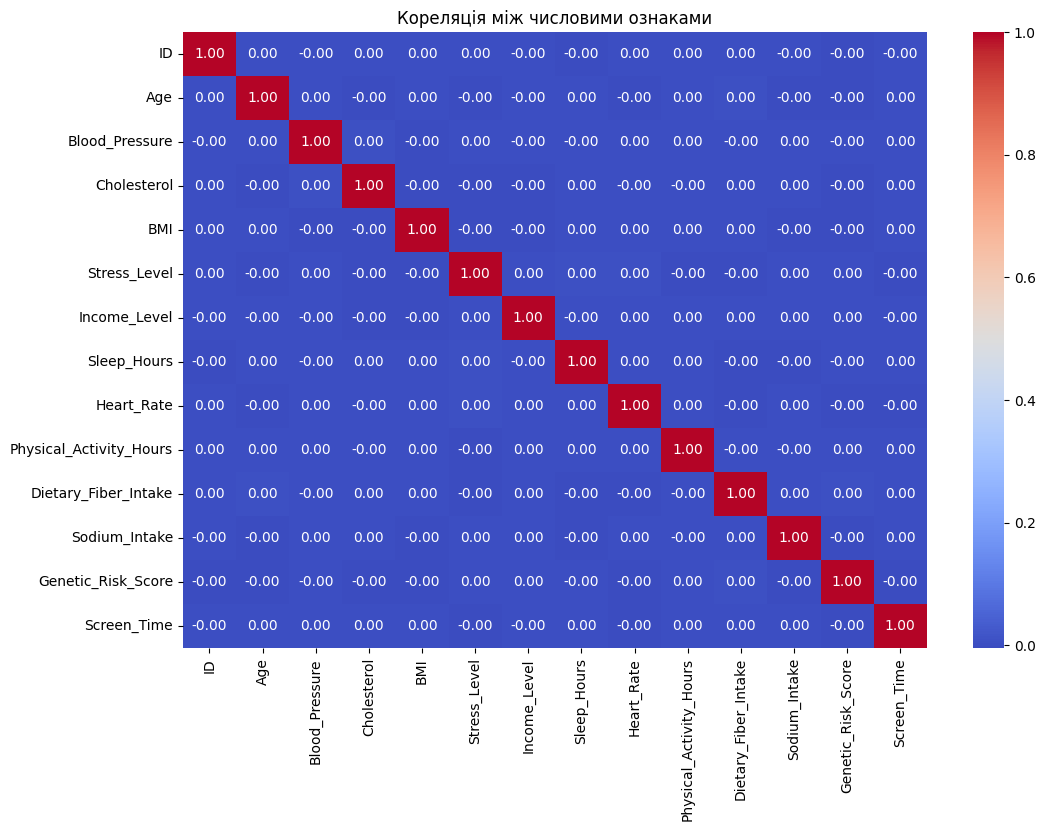

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Кореляція між числовими ознаками')
plt.show()

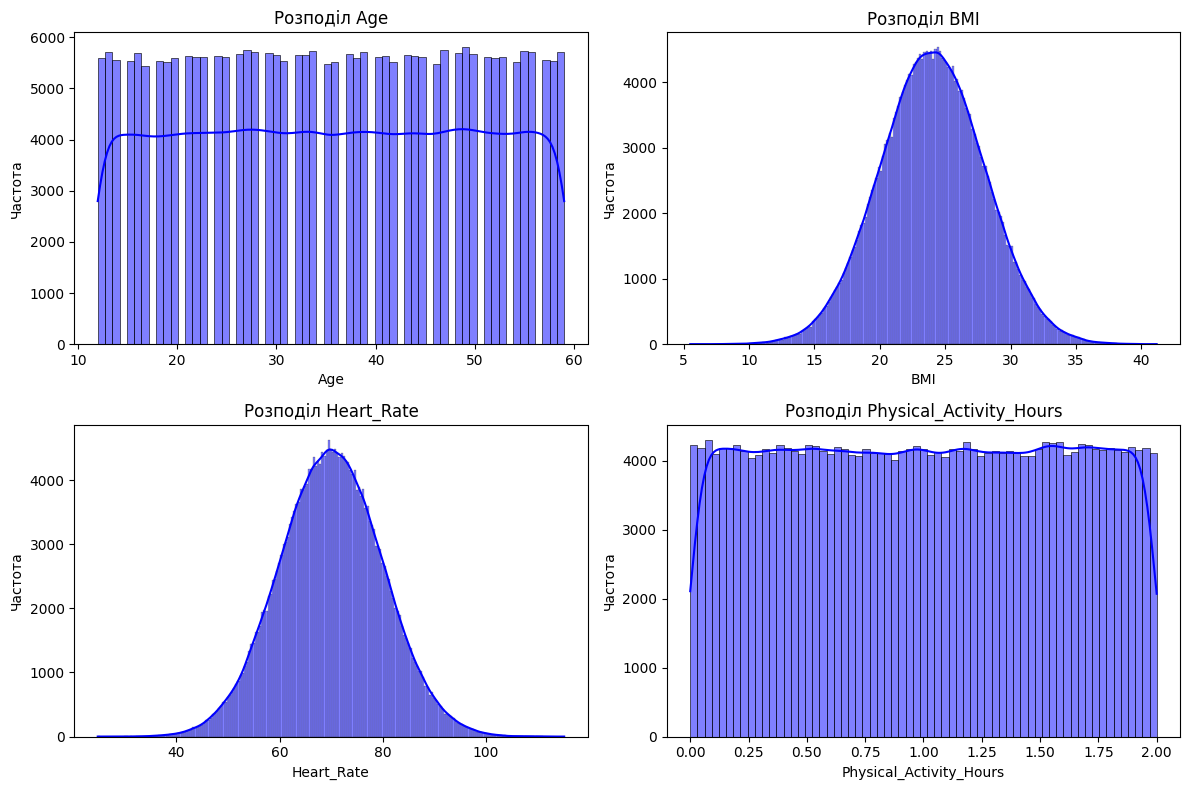

In [29]:
plt.figure(figsize=(12, 8))

features = ['Age', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


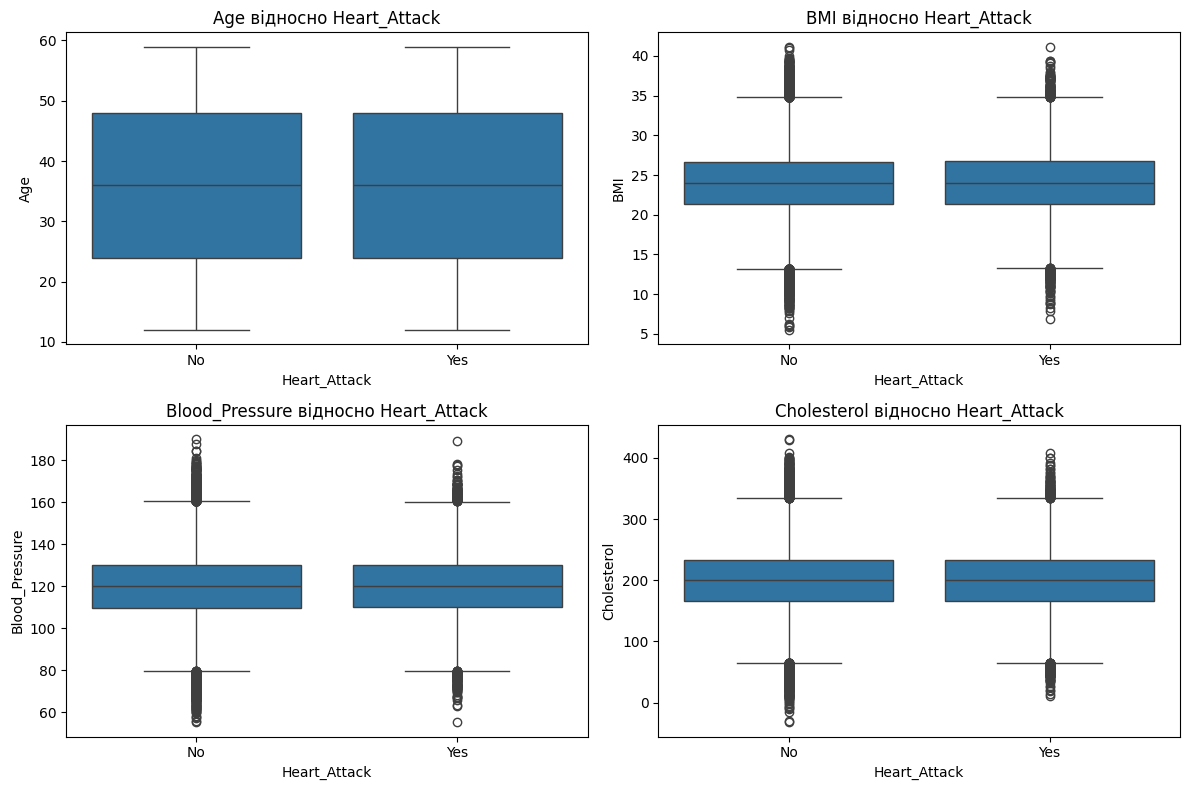

In [30]:
plt.figure(figsize=(12, 8))

features = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df['Heart_Attack'], y=df[feature])
    plt.title(f'{feature} відносно Heart_Attack')
    plt.xlabel('Heart_Attack')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

4) Нормалізувати дані

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_df = df.select_dtypes(include=['float64', 'int64'])

df[numerical_df.columns] = scaler.fit_transform(numerical_df)

print(df.head())

         ID       Age  Gender Heart_Attack  Blood_Pressure  Cholesterol  \
0  0.000000  0.808511  Female           No        0.687311     0.535124   
1  0.000004  0.595745  Female           No        0.476754     0.523777   
2  0.000007  0.297872  Female           No        0.351247     0.590956   
3  0.000011  0.893617    Male           No        0.490885     0.615759   
4  0.000015  0.148936  Female           No        0.555720     0.424248   

  Diabetes Smoking Alcohol_Consumption Exercise_Level  ...  Medication  \
0       No      No            Moderate            Low  ...          No   
1       No     Yes            Moderate            Low  ...          No   
2       No      No               Heavy            Low  ...          No   
3       No      No            Moderate           High  ...          No   
4       No     Yes               Heavy            Low  ...          No   

  Hypertension Heart_Rate  Physical_Activity_Hours Dietary_Fiber_Intake  \
0           No   0.379009    

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_df = df.select_dtypes(include=['float64', 'int64'])

df[numerical_df.columns] = scaler.fit_transform(numerical_df)

print(df.head())

         ID       Age  Gender Heart_Attack  Blood_Pressure  Cholesterol  \
0 -1.732044  1.045255  Female           No        1.866200     0.314311   
1 -1.732032  0.322916  Female           No       -0.030224     0.209463   
2 -1.732019 -0.688359  Female           No       -1.160633     0.830179   
3 -1.732006  1.334191    Male           No        0.097050     1.059354   
4 -1.731993 -1.193996  Female           No        0.680996    -0.710158   

  Diabetes Smoking Alcohol_Consumption Exercise_Level  ...  Medication  \
0       No      No            Moderate            Low  ...          No   
1       No     Yes            Moderate            Low  ...          No   
2       No      No               Heavy            Low  ...          No   
3       No      No            Moderate           High  ...          No   
4       No     Yes               Heavy            Low  ...          No   

  Hypertension Heart_Rate  Physical_Activity_Hours Dietary_Fiber_Intake  \
0           No  -1.097070    

5) Провести навчання наступних класифікаторів

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

print(df.columns)

X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі kNN: {accuracy:.2f}")

Index(['ID', 'Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
       'Income_Level', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours',
       'Dietary_Fiber_Intake', 'Sodium_Intake', 'Genetic_Risk_Score',
       'Screen_Time', 'Gender_Male', 'Gender_Other', 'Heart_Attack_Yes',
       'Diabetes_Yes', 'Smoking_Yes', 'Alcohol_Consumption_Moderate',
       'Exercise_Level_Low', 'Exercise_Level_Moderate', 'Family_History_Yes',
       'Diet_Type_Moderate', 'Diet_Type_Unhealthy', 'Residence_Urban',
       'Education_Level_Secondary', 'Education_Level_Tertiary',
       'Employment_Status_Student', 'Employment_Status_Unemployed',
       'Marital_Status_Married', 'Marital_Status_Single', 'Medication_Yes',
       'Hypertension_Yes', 'Cultural_Background_Other', 'Age_Group_Youth'],
      dtype='object')
Точність моделі kNN: 0.87


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

# Визначаємо фічі та мітки
X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

y_pred = dtc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність дерева ухвалення рішень: {accuracy:.2f}")

Точність дерева ухвалення рішень: 0.77


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='linear', C=0.1, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність SVM: {accuracy:.2f}")

Точність SVM: 0.88


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = rf_balanced.predict(X_test_scaled)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Точність Random Forest (balanced): {accuracy_balanced:.2f}")

Точність Random Forest (balanced): 0.88


Визначення точності AdaBoost та візуалізація матриці неточності

Точність AdaBoost: 0.88

Звіт класифікації:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94     71298
        True       0.00      0.00      0.00      9702

    accuracy                           0.88     81000
   macro avg       0.44      0.50      0.47     81000
weighted avg       0.77      0.88      0.82     81000


Матриця неточностей:
[[71298     0]
 [ 9702     0]]


c:\pyprojects\Laba1\khenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\pyprojects\Laba1\khenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\pyprojects\Laba1\khenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


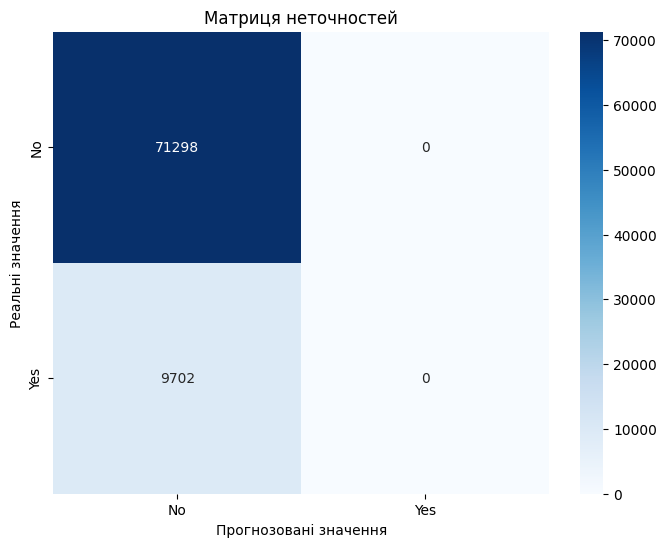

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_scaled, y_train)

y_pred = adaboost.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність AdaBoost: {accuracy:.2f}")

print("\nЗвіт класифікації:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nМатриця неточностей:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Матриця неточностей')
plt.xlabel('Прогнозовані значення')
plt.ylabel('Реальні значення')
plt.show()

Самими точними моделями вийшли: AdaBoost, Random Forest (balanced), SVM.